In [1]:
#accessing netcdf files from Hector's folders
import os, glob, sys
sys.path.append("//nobackup//amondal//Python//Hector_Python_Scripts")
sys.path.append("//nobackup/amondal//Python//mit_geos_analysis")
#from mds_store import openmdsdataset
#playing with netcdf - xarray
import numpy as np
import xarray as xr
import dask.array as da
import matplotlib.pyplot as plt
# How about visualization?
%matplotlib inline
import netCDF4
from netCDF4 import Dataset
#from xmitgcm import open_mdsdataset
from GetNCDataSet import getMITNCDataSet
from MITllc2160Depth import *
sys.path.append("//nobackup/amondal//Python//xmitgcm//xmitgcm")
from xmitgcm.mds_store import open_mdsdataset
import xrft

from dask.distributed import Client
client = Client(memory_limit='90GB',n_workers = 40, threads_per_worker=1)

In [2]:
from spectral_analysis_code import *

In [3]:
W15 = getMITNCDataSet('/nobackup/amondal/NCData/20211116_QTprime_superbig_shorttime_explore_region/', 'W', 15,15)
T15 = getMITNCDataSet('/nobackup/amondal/NCData/20211116_QTprime_superbig_shorttime_explore_region/', 'Theta', 15,15)

Time combined dataset has been opened.
I concatenated the first Z-layer
Time combined dataset has been opened.
I concatenated the first Z-layer


In [4]:
W15c = W15.W.compute()
T15c = T15.Theta.compute()

In [5]:
W15c = xr.where(np.isnan(W15c), 0, W15c)
T15c = xr.where(np.isnan(T15c), 0, T15c)

In [6]:
#W15cr = regularizeCoordinates(W15c,'linear',timeunits = 'hours')
#T15cr = regularizeCoordinates(T15c,'linear',timeunits = 'hours')
W15cr_d = xrft.detrend(xrft.detrend(W15c, dim='time', detrend_type = 'linear'), dim=['lat','lon'], detrend_type = 'linear')
T15cr_d = xrft.detrend(xrft.detrend(T15c, dim='time', detrend_type = 'linear'), dim=['lat','lon'], detrend_type = 'linear')

In [7]:
W15_short = W15cr_d[0:360]
T15_short = T15cr_d[0:360]


In [8]:
W15_lp = movingWindowAverage(W15_short, 'time', 24, 'lat')
T15_lp = movingWindowAverage(T15_short, 'time', 24, 'lat')

In [9]:
W15c_lp = W15_lp.compute()
T15c_lp = T15_lp.compute()

In [10]:
WpTp_lp = W15c_lp*T15c_lp*4.2e6

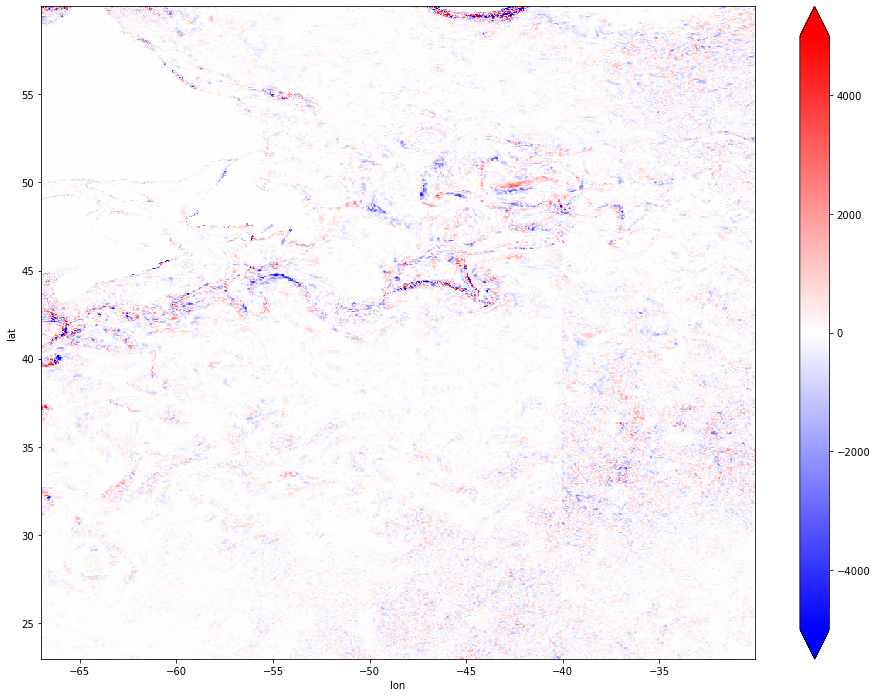

In [14]:
%matplotlib inline
WpTp_lp[100].plot(vmin=-5000, vmax=5000, cmap='bwr',figsize=(16,12) )

---------------------------------------------------------------------------------------------------------------------
Checking out kinetic energy in this region

this isn't working for some reason - but other loads do. In any case, you definitely need to look at a bigger region

In [6]:
U0 = getMITNCDataSet('/nobackup/amondal/NCData/20210830_RegBal_5day/', 'KPPhbl', 0,0)
#V0 = getMITNCDataSet('/nobackup/amondal/NCData/20211213_spectra_practice/', 'V', 0,0)

Time combined dataset has been opened.
I concatenated the first Z-layer


In [ ]:
KE = U0